In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path  = 'drive/My Drive/br-capes-colsucup-projeto-financiador-2017-2018-08-01.csv'
df = pd.read_csv(path, sep=';',encoding='latin1')

Mounted at /content/drive


In [ ]:
#análise da base de finnaciadores 2017-2019

In [2]:
df.head()



,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
0,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNO...,GD,BOLSA DE DOUTORADO NO PAÍS GD,NÃO,BRASIL
1,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,DS,PROGRAMA DE DEMANDA SOCIAL,NÃO,BRASIL
2,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,PNPD/CAPES,PROGRAMA NACIONAL DE PÓS-DOUTORADO/CAPES,NÃO,BRASIL
3,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988,USP,UNIVERSIDADE DE SÃO PAULO,OUTRO AUXÍLIO FINANCEIRO,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,PROAP,APOIO À PÓS-GRADUAÇÃO,NÃO,BRASIL
4,2017,64913,127807,4856161,237993,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,FAPDF5/13,FAPDF 05/2013 - PRIMEIROS PROJETOS,NÃO,BRASIL


In [13]:
#universidades que recebem mais investimentos

In [7]:
df.groupby("SG_ENTIDADE_ENSINO") .count()['NM_FINANCIADOR'].sort_values(ascending=False)

SG_ENTIDADE_ENSINO
USP        8516
UFRJ       5931
UFMG       4634
UFRGS      4578
UNICAMP    3797
           ... 
FBV           1
CPII          1
FMU           1
UI            1
FDSM          1
Name: NM_FINANCIADOR, Length: 380, dtype: int64

In [4]:
df1 = pd.read_csv("drive/My Drive/br-capes-colsucup-projeto-financiador-2018-2019-10-01 (1).csv",sep=';',encoding='latin1')

In [ ]:
df1.head()

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
0,2018,76636,141385,5511639,341579,31004016006P5,EDUCAÇÃO,1979,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,BOLSA,CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNO...,GRANT,GRANT DO PESQUISADOR,NÃO,BRASIL
1,2018,76636,141385,5511639,341579,31004016006P5,EDUCAÇÃO,1979,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,OUTRO AUXÍLIO FINANCEIRO,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,PROEX,PROGRAMA DE EXCELÊNCIA ACADÊMICA,NÃO,BRASIL
2,2018,76636,141385,5511639,341579,31004016006P5,EDUCAÇÃO,1979,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQU...,CNE,CIENTISTA DO NOSSO ESTADO,NÃO,BRASIL
3,2018,76636,141385,5511671,371429,31004016006P5,EDUCAÇÃO,1979,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,BOLSA,CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNO...,PQ,BOLSA PRODUTIVIDADE EM PESQUISA,NÃO,BRASIL
4,2018,76636,141385,5511671,371429,31004016006P5,EDUCAÇÃO,1979,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQU...,FAPERJ,"EDITAL FAPERJ N.º 12/2011 - PROGRAMA ""CIENTIST...",NÃO,BRASIL


In [8]:
b = df1.groupby("SG_ENTIDADE_ENSINO") .count()['NM_FINANCIADOR'].sort_values(ascending=False)

In [9]:
b.reset_index(level=['SG_ENTIDADE_ENSINO'])

,SG_ENTIDADE_ENSINO,NM_FINANCIADOR
0,USP,8812
1,UFRJ,6205
2,UFMG,4856
3,UFRGS,4722
4,UNICAMP,4180
...,...,...
388,CPII,1
389,FVC,1
390,IFTM,1
391,UNIFBV-WYDEN,1


In [11]:
df2 = pd.read_csv("drive/My Drive/br-capes-colsucup-financiador-2019-2020-11-30.csv",sep=';',encoding='latin1')
df2.head()

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
0,2019,81349,144701,5559355,569602,26001012171P2,CIÊNCIA DA INFORMAÇÃO,2019,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,OUTRO AUXÍLIO FINANCEIRO,CONSELHO NACIONAL DE DESENVOLVIMENTO CIENTIFIC...,CNPQ,(AUXÍLIO FINANCEIRO À PESQUISA),NÃO,BRASIL
1,2019,81349,144701,5559358,569574,26001012171P2,CIÊNCIA DA INFORMAÇÃO,2019,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE AMPARO A PESQUISA DO ESTADO DE ALA...,AUX PESQ,AUXÍLIO A PESQUISA,NÃO,BRASIL
2,2019,81349,144701,5559357,573426,26001012171P2,CIÊNCIA DA INFORMAÇÃO,2019,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE AMPARO A PESQUISA DO ESTADO DE ALA...,FAPEAL,EDITAL UNIVERSAL FAPEAL N° 04/2016,NÃO,BRASIL
3,2019,81349,144701,5559360,569572,26001012171P2,CIÊNCIA DA INFORMAÇÃO,2019,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,BOLSA,FUNDACAO UNIVERSITARIA DE DESENV DE EXTENSAO E...,FUNDEPES,FUNDACAO UNIVERSITARIA DE DESENV DE EXTENSAO E...,NÃO,BRASIL
4,2019,81644,144818,5560097,554178,33003017034P8,ENGENHARIA QUÍMICA,1980,UNICAMP,UNIVERSIDADE ESTADUAL DE CAMPINAS,OUTRO AUXÍLIO FINANCEIRO,"AGENCIA NACIONAL DO PETROLEO, GAS NATURAL E BI...",PP,PROJETOS DE PESQUISA,NÃO,BRASIL


In [12]:
c = df2.groupby("SG_ENTIDADE_ENSINO") .count()['NM_FINANCIADOR'].sort_values(ascending=False)
c.reset_index(level=['SG_ENTIDADE_ENSINO'])


,SG_ENTIDADE_ENSINO,NM_FINANCIADOR
0,USP,8687
1,UFRJ,7129
2,UFMG,5128
3,UFRGS,4852
4,UNICAMP,3977
...,...,...
416,UNIFBV-WYDEN,1
417,FCMMG,1
418,IFPE,1
419,FACPP,1


In [16]:
df3 = pd.concat([df,df1,df2], axis = 0)

In [ ]:
#Paies que mais fincanciam

In [17]:
df3.groupby ("NM_PAIS_FINANCIADOR",). count()['AN_BASE'].sort_values(ascending=False)


NM_PAIS_FINANCIADOR
BRASIL                    435707
ESTADOS UNIDOS              1272
REINO UNIDO                  523
FRANÇA                       393
ALEMANHA                     312
BÉLGICA                      259
CANADÁ                       173
ESPANHA                       87
SUÍÇA                         79
PORTUGAL                      68
SUÉCIA                        67
HOLANDA                       61
ARGENTINA                     58
NORUEGA                       57
ITÁLIA                        38
CHILE                         26
MÉXICO                        26
ÁUSTRIA                       23
PERU                          23
COLÔMBIA                      23
AUSTRÁLIA                     20
QUÊNIA                        14
ÁFRICA DO SUL                 11
CHINA                         10
DINAMARCA                     10
GRÉCIA                         9
IRLANDA                        8
URUGUAI                        7
EMIRADOS ÁRABES UNIDOS         5
JAPÃO                  

In [18]:
def pais(col):
  PAIS = col[0]

  if PAIS == 'BRASIL':
    return 0
  else:
    return 1
df3['NM_PAIS_FINANCIADOR']=df3[['NM_PAIS_FINANCIADOR']].apply(pais, axis = 1)      



In [22]:
#criando base com apenas financiadores estrangeiros utilizando o comando 'filtro'

In [19]:
df3.head()

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
0,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNO...,GD,BOLSA DE DOUTORADO NO PAÍS GD,NÃO,0
1,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,DS,PROGRAMA DE DEMANDA SOCIAL,NÃO,0
2,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,PNPD/CAPES,PROGRAMA NACIONAL DE PÓS-DOUTORADO/CAPES,NÃO,0
3,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988,USP,UNIVERSIDADE DE SÃO PAULO,OUTRO AUXÍLIO FINANCEIRO,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,PROAP,APOIO À PÓS-GRADUAÇÃO,NÃO,0
4,2017,64913,127807,4856161,237993,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,FAPDF5/13,FAPDF 05/2013 - PRIMEIROS PROJETOS,NÃO,0


In [21]:
filtro  = df3['NM_PAIS_FINANCIADOR'] > 0
d = df3[filtro]
d.head()

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
5,2017,64913,127807,4856163,436966,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,SWEDISH RESEARCH COUNCIL,A. P.,AUXILIO A PESQUISA,SIM,1
203,2017,64937,127831,4856823,311491,15001016022P6,ZOOLOGIA,1996,UFPA,UNIVERSIDADE FEDERAL DO PARÁ,OUTRO AUXÍLIO FINANCEIRO,THE U.S. AGENCY FOR INTERNATIONAL DEVELOPMENT,USAID,AUXILIO FINANCEIRO,SIM,1
396,2017,64937,127831,4856944,447723,15001016022P6,ZOOLOGIA,1996,UFPA,UNIVERSIDADE FEDERAL DO PARÁ,OUTRO AUXÍLIO FINANCEIRO,THE U.S. AGENCY FOR INTERNATIONAL DEVELOPMENT,USAID,AUXILIO FINANCEIRO,SIM,1
453,2017,63523,127057,4830543,441659,32006012009P0,ECONOMIA,1996,UFU,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,OUTRO AUXÍLIO FINANCEIRO,DEUTSCHER AKADEMISCHER AUSTAUSCH DIENST - DAAD,AUX,AUXÍLIO FINANCEIRO,SIM,1
876,2017,62283,126397,4821383,430046,42020018008P7,ADMINISTRAÇÃO,2011,UNISC,UNIVERSIDADE DE SANTA CRUZ DO SUL,OUTRO AUXÍLIO FINANCEIRO,ECONOMIC AND SOCIAL RESEARCH COUNCIL,AUX,AUXÍLIO FINANCEIRO,SIM,1


In [23]:
#universidades que mais recebem investimentos estrangeiros

In [ ]:
d.groupby ("NM_ENTIDADE_ENSINO"). count()['NM_PAIS_FINANCIADOR'].sort_values(ascending=False)

NM_ENTIDADE_ENSINO
UNIVERSIDADE DE SÃO PAULO                                                         95
UNIVERSIDADE FEDERAL DO RIO DE JANEIRO                                            55
UNIVERSIDADE FEDERAL DO PARÁ                                                      53
UNIVERSIDADE DE BRASÍLIA                                                          44
UNIVERSIDADE ESTADUAL DE CAMPINAS                                                 42
                                                                                  ..
UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO ( PRESIDENTE PRUDENTE )     1
UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO ( ILHA SOLTEIRA )           1
UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO ( ARARAQUARA )              1
UNIVERSIDADE ESTADUAL DO OESTE DO PARANA                                           1
CENTRO FEDERAL DE EDUCAÇÃO TECN. CELSO SUCKOW DA FONSECA                           1
Name: NM_PAIS_FINANCIADOR, Length: 127, dtype:

In [24]:
#formas de inevestimentos estrangeiro/total

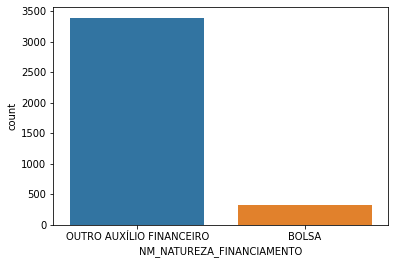

In [25]:
sns.countplot(x='NM_NATUREZA_FINANCIAMENTO', data=d)



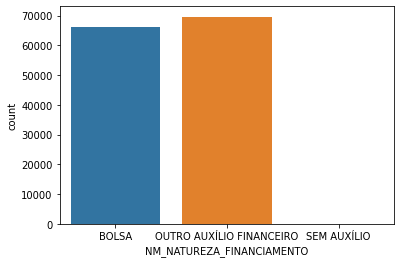

In [ ]:
sns.countplot(x='NM_NATUREZA_FINANCIAMENTO', data=df3)

In [ ]:
#Áreas com mais investimetos

In [26]:
df3.groupby('NM_PROGRAMA_IES').count() ['AN_BASE'].sort_values(ascending=False).head(10)

NM_PROGRAMA_IES
EDUCAÇÃO               12306
QUÍMICA                 9978
ENGENHARIA MECÂNICA     7585
ODONTOLOGIA             7454
CIÊNCIAS DA SAÚDE       7078
ENGENHARIA QUÍMICA      6750
ENGENHARIA ELÉTRICA     6391
FÍSICA                  6239
ZOOTECNIA               6204
ADMINISTRAÇÃO           5864
Name: AN_BASE, dtype: int64

In [27]:
#filtrando a base pelas principais áreas

In [28]:
filtro = (df3['NM_PROGRAMA_IES'] == 'EDUCAÇÃO') | (df3['NM_PROGRAMA_IES'] == 'QUÍMICA') | (df3['NM_PROGRAMA_IES']=='ENGENHARIA MECÂNICA') | (df3['NM_PROGRAMA_IES']=='ODONTOLOGIA')

In [29]:
e= df3[filtro]

In [31]:
e.head()

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
23,2017,65009,127904,4859913,335879,31004016008P8,ODONTOLOGIA,1982,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,BOLSA,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQU...,FAPERJ,COTA DE BOLSAS DE MESTRADO E DOUTORADO,NÃO,0
24,2017,65009,127904,4859916,335852,31004016008P8,ODONTOLOGIA,1982,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,DS,PROGRAMA DE DEMANDA SOCIAL,NÃO,0
25,2017,65009,127904,4859932,335106,31004016008P8,ODONTOLOGIA,1982,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,DS,PROGRAMA DE DEMANDA SOCIAL,NÃO,0
26,2017,65009,127904,4859933,128003,31004016008P8,ODONTOLOGIA,1982,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,BEX,BOLSAS NO EXTERIOR,NÃO,0
27,2017,65009,127904,4859907,335884,31004016008P8,ODONTOLOGIA,1982,UERJ,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,DS,PROGRAMA DE DEMANDA SOCIAL,NÃO,0


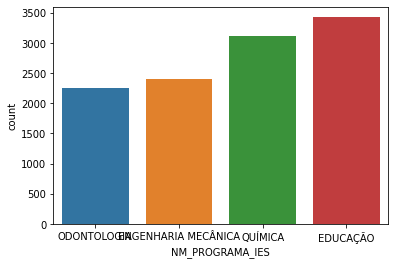

In [ ]:
sns.countplot(x='NM_PROGRAMA_IES', data = e)

In [32]:
#universidades que mais recebem investimentos dentre as principais áreas de ensino

In [ ]:
e.groupby('NM_ENTIDADE_ENSINO').count() ['AN_BASE'].sort_values(ascending =False).head(10)


NM_ENTIDADE_ENSINO
UNIVERSIDADE FEDERAL DE UBERLÂNDIA          793
UNIVERSIDADE FEDERAL DE MINAS GERAIS        479
UNIVERSIDADE FEDERAL DO PARANÁ              460
UNIVERSIDADE ESTADUAL DE CAMPINAS           447
UNIVERSIDADE DE SÃO PAULO                   401
UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO    363
UNIVERSIDADE FEDERAL FLUMINENSE             329
UNIVERSIDADE FEDERAL DO CEARÁ               327
UNIVERSIDADE FEDERAL DE PERNAMBUCO          291
UNIVERSIDADE FEDERAL DE SANTA CATARINA      278
Name: AN_BASE, dtype: int64

In [33]:
#agrupando as bases por cd do programa

In [34]:
df3.groupby('CD_PROGRAMA_IES').count()

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
CD_PROGRAMA_IES,,,,,,,,,,,,,,,
10001018002P1,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163
10001018004P4,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
10001018005P0,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
10001018006P7,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
10001018009P6,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53023013001P2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
53029011002P7,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105
53044002001P7,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [35]:
#filtrando por ano e in financiador

In [36]:
df3.query("IN_FINANCIADOR_ESTRANGEIRO =='NÃO' and AN_BASE== 2019 ")

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
0,2019,81349,144701,5559355,569602,26001012171P2,CIÊNCIA DA INFORMAÇÃO,2019,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,OUTRO AUXÍLIO FINANCEIRO,CONSELHO NACIONAL DE DESENVOLVIMENTO CIENTIFIC...,CNPQ,(AUXÍLIO FINANCEIRO À PESQUISA),NÃO,0
1,2019,81349,144701,5559358,569574,26001012171P2,CIÊNCIA DA INFORMAÇÃO,2019,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE AMPARO A PESQUISA DO ESTADO DE ALA...,AUX PESQ,AUXÍLIO A PESQUISA,NÃO,0
2,2019,81349,144701,5559357,573426,26001012171P2,CIÊNCIA DA INFORMAÇÃO,2019,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE AMPARO A PESQUISA DO ESTADO DE ALA...,FAPEAL,EDITAL UNIVERSAL FAPEAL N° 04/2016,NÃO,0
3,2019,81349,144701,5559360,569572,26001012171P2,CIÊNCIA DA INFORMAÇÃO,2019,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,BOLSA,FUNDACAO UNIVERSITARIA DE DESENV DE EXTENSAO E...,FUNDEPES,FUNDACAO UNIVERSITARIA DE DESENV DE EXTENSAO E...,NÃO,0
4,2019,81644,144818,5560097,554178,33003017034P8,ENGENHARIA QUÍMICA,1980,UNICAMP,UNIVERSIDADE ESTADUAL DE CAMPINAS,OUTRO AUXÍLIO FINANCEIRO,"AGENCIA NACIONAL DO PETROLEO, GAS NATURAL E BI...",PP,PROJETOS DE PESQUISA,NÃO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158324,2019,94756,159931,5909169,136231,31033016002P9,BIOCIÊNCIAS E BIOTECNOLOGIA,1994,UENF,UNIVERSIDADE ESTADUAL DO NORTE FLUMINENSE DARC...,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQU...,CNE,CIENTISTA DO NOSSO ESTADO,NÃO,0
158325,2019,94756,159931,5909166,136229,31033016002P9,BIOCIÊNCIAS E BIOTECNOLOGIA,1994,UENF,UNIVERSIDADE ESTADUAL DO NORTE FLUMINENSE DARC...,BOLSA,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQU...,CNE,CIENTISTA DO NOSSO ESTADO,NÃO,0
158326,2019,94756,159931,5909166,136229,31033016002P9,BIOCIÊNCIAS E BIOTECNOLOGIA,1994,UENF,UNIVERSIDADE ESTADUAL DO NORTE FLUMINENSE DARC...,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQU...,CNE,CIENTISTA DO NOSSO ESTADO,NÃO,0
158327,2019,94756,159931,5909165,136233,31033016002P9,BIOCIÊNCIAS E BIOTECNOLOGIA,1994,UENF,UNIVERSIDADE ESTADUAL DO NORTE FLUMINENSE DARC...,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQU...,CNE,CIENTISTA DO NOSSO ESTADO,NÃO,0


In [37]:
#verificando os programas de fomento existente

In [38]:
df3["SG_PROGRAMA_FOMENTO"].unique().tolist()

['GD',
 'DS',
 'PNPD/CAPES',
 'PROAP',
 'FAPDF5/13',
 'A. P.',
 'PRONEX2016',
 'UNI2016B',
 'MCT31/2005',
 'PRO-EQUIPAMENTOS',
 'LIFE',
 'PRONEX',
 'ED03/2016',
 '14/2012',
 'FAP05/2014',
 'GM E GD',
 'AP',
 'PROF',
 'PRONEX/CNP',
 'FAPERJ',
 'BEX',
 'CNPQ',
 'BOLSA DO PAÍS - PESQUISA',
 'CNPQ MDA',
 'PQ',
 'FAPEMIG',
 'AF',
 'AP-R',
 'FUNDEPG',
 'PIBIC',
 'MACROP',
 'FUNDAG-AUX',
 'BOLSA DE MESTRADO',
 'TT-3',
 'PNPD',
 'PACTI',
 'FAPERGS',
 'MCTI/CNPQ',
 'MCTI',
 'CNPQ012016',
 'POS-DOC',
 'MEMORIAS',
 'PROCAD',
 'PROSCN',
 'AR',
 'BOLSA INICIAÇÃO',
 'PROSUP/TAXAS',
 'BOLSA DE DOUTORADO',
 'PAEP',
 'PROSUP/BOLSAS',
 'PDSE',
 'FAPESP/RCT',
 'EMBRAPA',
 'FAP',
 'FAPIC',
 'PNPD INSTITUCIONAL',
 'B.PD',
 'MUNICH',
 'IBDAGRO',
 'FIESP',
 'FAEMG',
 'AUXPESQ',
 'FEALQ',
 'AUXÍLIO',
 'COPERSUCAR',
 'PROEX',
 'DSA',
 'ARA',
 'FAPESPA',
 'USAID',
 'GM',
 'PETROBRÁS',
 'MCTI UNIV',
 'PMA',
 'PROTAX',
 'ARPA',
 'FIOCRUZ',
 'UNIVERSAL',
 'PAPG',
 'PRIMPROJ',
 'ORÇAMENTO',
 'SPRINT',
 '61/2011',
 

In [40]:
df3.groupby(['CD_PROGRAMA_IES', 'SG_PROGRAMA_FOMENTO', ]).count().reset_index()

,CD_PROGRAMA_IES,SG_PROGRAMA_FOMENTO,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
0,10001018002P1,BOLSAS,79,79,79,79,79,79,79,79,79,79,79,79,79,79
1,10001018002P1,FIOTEC,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,10001018002P1,MCT,71,71,71,71,71,71,71,71,71,71,71,71,71,71
3,10001018002P1,PPSUS,12,12,12,12,12,12,12,12,12,12,12,12,12,12
4,10001018004P4,AP,36,36,36,36,36,36,36,36,36,36,36,36,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42854,53062000002P4,AP-R,2,2,2,2,2,2,2,2,2,2,2,2,2,2
42855,53062000002P4,AUX,1,1,1,1,1,1,1,1,1,1,1,1,1,1
42856,53062000002P4,GVPESQUISA,7,7,7,7,7,7,7,7,7,7,7,7,7,7
42857,53062000002P4,IPEA,1,1,1,1,1,1,1,1,1,1,1,1,1,1
